# LAB 3 - Prediction of Numeric Values

## By
 - Name: JOLINSON RICHI 
 - Register Number: 21122030
 - Class: 2MscDs

# Lab Overview

# Problem Definition

**Common Instructions**
 - Use Pandas to Import the Dataset
 - Do the necessary Exploratory Data Analysis
 - Use the train_test_split method available in SCIKIT to split the dataset into Train Dataset and Test Dataset.
 - Show the Regression Score, Intercept and other parameters etc in the Output
 - Use visualizations and plots wherever possible
 - Format the outputs neatly; Do Documentation, Data Set Description, Objectives, Observations, Conclusions etc as you have done in your previous lab
 
**Questions**
1. What are your observations on the Dataset?
2. What are the different Error Measures (Evaluation Metrics) in relation to Linear Regression? How much do you get in the above cases?
3. Note down the errors/losses when the train-test ratio is 50:50, 60:40, 70:30, and 80:20
4. During LinearRegression() process, what is the impact of giving TRUE/FALSE as the value for Normalize Parameter?

**Cases
Try to predict the rent of the below houses -**
1. 1 BHK with 2 Baths in Portofino Street
2. Fully Furnished 2 BHK in School Street
3. Single Room anywhere in Lavasa

# Objective
 - Understand the dataset and features.
 - Analyse the dataset.
 - Exploring the given insight.

# Approach
 - Importing all libraries which we needed.
 - Perform data preprocessing technique to get balanced structured data.
 - Perform statistical data analysis and derive valuable inference.
 - perform exploratory data analysis and derive valuable inference.
 - Visualizing things with some plot and derive valuable inference.
 - Train and test through LinearRegression models for better prediction.

**Common Instructions**
 - Use Pandas to Import the Dataset
 - Do the necessary Exploratory Data Analysis
 - Use the train_test_split method available in SCIKIT to split the dataset into Train Dataset and Test Dataset.
 - Show the Regression Score, Intercept and other parameters etc in the Output
 - Use visualizations and plots wherever possible
 - Format the outputs neatly; Do Documentation, Data Set Description, Objectives, Observations, Conclusions etc as you have done in your previous lab

### Importing libraries

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
hbk = pd.read_csv("D:\AJR\machine learning\HousePrices.csv")
hbk

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
0,Minimum Budget Rooms,Portofino H,1 BHK,400.0,1,1,1,1100.0
1,Minimum Budget Rooms,Portofino H,1 BHK,450.0,1,1,1,1100.0
2,Minimum Budget Rooms,School Street,1 BHK,530.0,1,1,0,1166.0
3,Minimum Budget Rooms,Portofino B,1 BHK,400.0,1,1,0,1400.0
4,Minimum Budget Rooms,School Street,2 BHK,460.0,1,1,0,1500.0
...,...,...,...,...,...,...,...,...
995,Super Furnished Villa,Portofino D,4 BHK,4900.0,4,6,3,70000.0
996,Super Furnished Villa,Portofino B,4 BHK,3750.0,4,5,0,76000.0
997,Super Furnished Villa,School Street,4 BHK,5270.0,4,5,3,80000.0
998,Super Furnished Villa,Portofino B,6 BHK,5100.0,7,6,3,90000.0


In [3]:
hbk.describe()

,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1548.270010,2.661000,2.168000,1.544000,10476.633500
std,1345.141175,1.247251,0.959529,0.838312,10509.508971
min,375.000000,1.000000,1.000000,0.000000,1100.000000
25%,1090.000000,2.000000,2.000000,1.000000,4890.500000
50%,1270.000000,2.000000,2.000000,2.000000,7000.000000
75%,1664.250000,3.000000,2.000000,2.000000,11925.000000
max,35000.000000,11.000000,6.000000,3.000000,96000.000000


In [4]:
hbk.info

<bound method DataFrame.info of               BuildingType       Location   Size  AreaSqFt  NoOfBath  \
0     Minimum Budget Rooms    Portofino H  1 BHK     400.0         1   
1     Minimum Budget Rooms    Portofino H  1 BHK     450.0         1   
2     Minimum Budget Rooms  School Street  1 BHK     530.0         1   
3     Minimum Budget Rooms    Portofino B  1 BHK     400.0         1   
4     Minimum Budget Rooms  School Street  2 BHK     460.0         1   
..                     ...            ...    ...       ...       ...   
995  Super Furnished Villa    Portofino D  4 BHK    4900.0         4   
996  Super Furnished Villa    Portofino B  4 BHK    3750.0         4   
997  Super Furnished Villa  School Street  4 BHK    5270.0         4   
998  Super Furnished Villa    Portofino B  6 BHK    5100.0         7   
999  Super Furnished Villa    Portofino B  7 BHK    6300.0         6   

     NoOfPeople  NoOfBalcony  RentPerMonth  
0             1            1        1100.0  
1            

In [21]:
hbk.isnull().sum()

BuildingType    0
Location        0
Size            0
AreaSqFt        0
NoOfBath        0
NoOfPeople      0
NoOfBalcony     0
RentPerMonth    0
dtype: int64

In [23]:
hbk.groupby('Size')['AreaSqFt'].mean()

Size
1 BHK     670.294118
1 RK      477.500000
2 BHK    1132.487203
3 BHK    1753.385269
4 BHK    2644.805825
5 BHK    2331.090909
6 BHK    1829.238095
7 BHK    2660.714286
8 BHK    2093.750000
9 BHK    2715.000000
Name: AreaSqFt, dtype: float64

In [25]:
hbk.duplicated().sum()

6

In [27]:
hbk.skew()

AreaSqFt        16.025687
NoOfBath         2.119702
NoOfPeople       1.600491
NoOfBalcony     -0.011505
RentPerMonth     3.477116
dtype: float64

In [28]:
hbk.corr()

,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
AreaSqFt,1.000000,0.375791,0.374907,0.206123,0.473022
NoOfBath,0.375791,1.000000,0.480063,0.258885,0.579693
NoOfPeople,0.374907,0.480063,1.000000,0.184932,0.782853
NoOfBalcony,0.206123,0.258885,0.184932,1.000000,0.193619
RentPerMonth,0.473022,0.579693,0.782853,0.193619,1.000000


[]

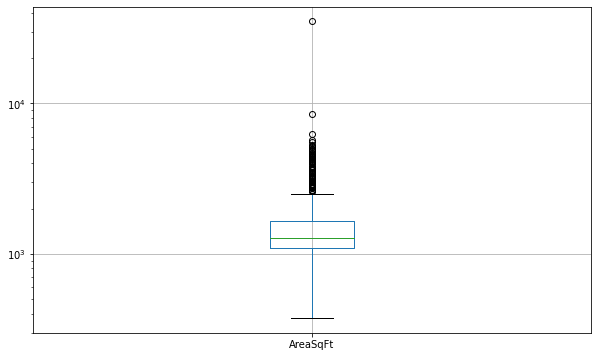

In [33]:
fig=plt.figure(figsize=(10,6))
hbk.boxplot(column=['AreaSqFt'])
plt.semilogy()

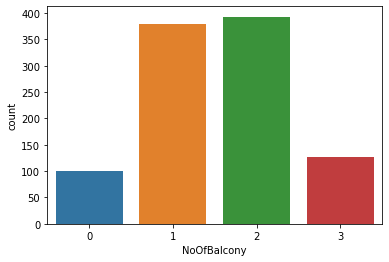

In [35]:
plt=sns.countplot(x='NoOfBalcony',data=hbk)

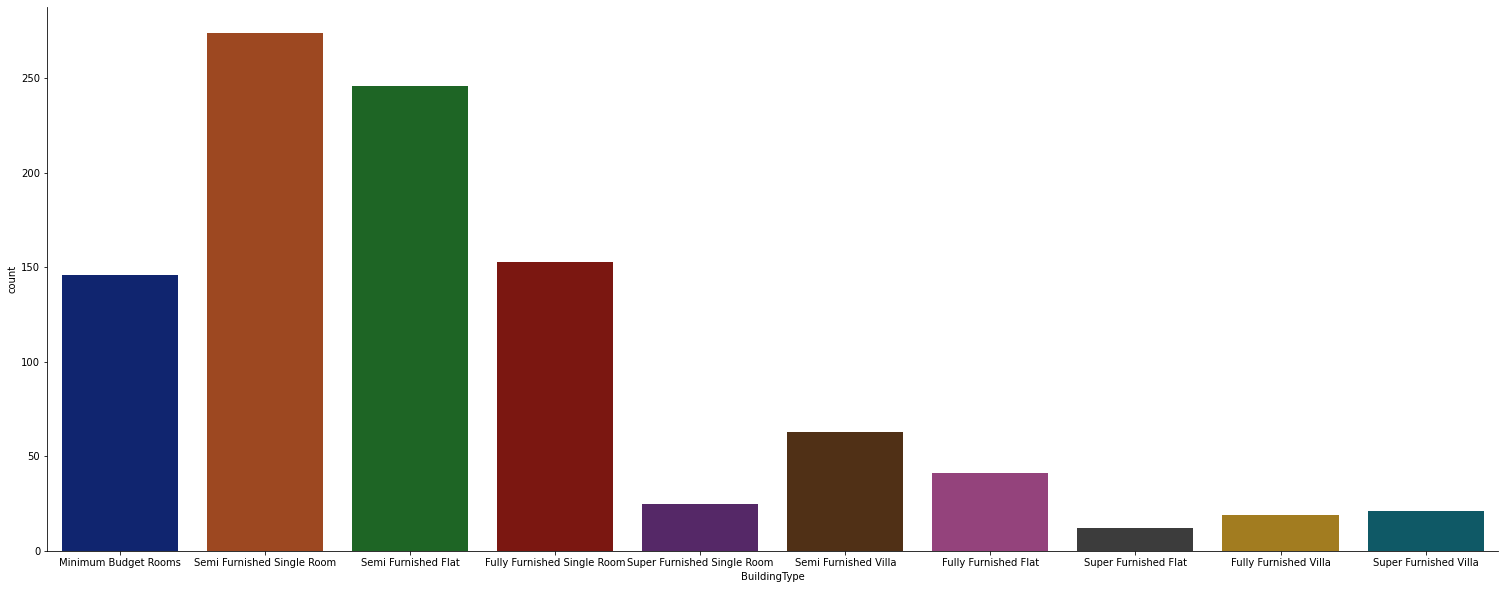

In [41]:
plt.figure(figsize = [26,10])
sns.countplot(x = 'BuildingType', palette = "dark", alpha = 1, data = hbk)
sns.despine()

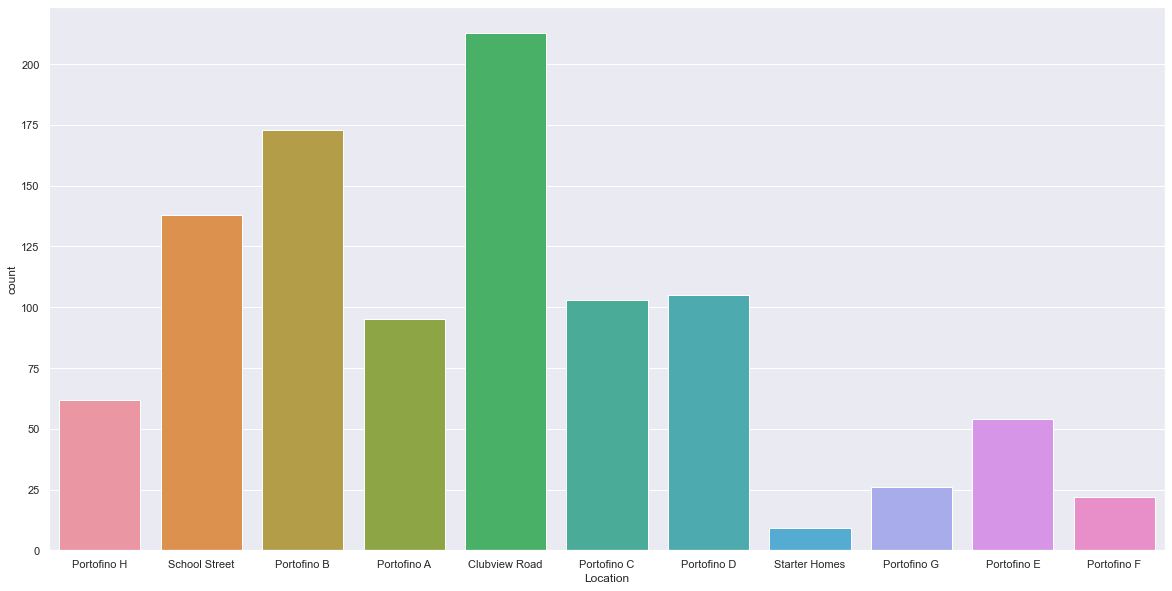

In [12]:
plt=sns.countplot(x='Location',data=hbk)
sns.set(rc = {'figure.figsize':(15,10)})

In [50]:
Pie = hbk['BuildingType'].value_counts().reset_index()
Pie.columns = ['BuildingType','Percent']
Pie['Percent'] /= len(hbk)
fig = px.pie(Pie, names = 'BuildingType', values = 'Percent', title = 'BuildingType', color = "Percent", color_discrete_sequence = px.colors.sequential.RdBu)
fig.show()

In [47]:
Pie = hbk['Location'].value_counts().reset_index()
Pie.columns = ['Location','Percent']
Pie['Percent'] /= len(hbk)
fig = px.pie(Pie, names = 'Location', values = 'Percent', title = 'Location', color = "Percent", color_discrete_sequence = px.colors.sequential.RdBu)
fig.show()

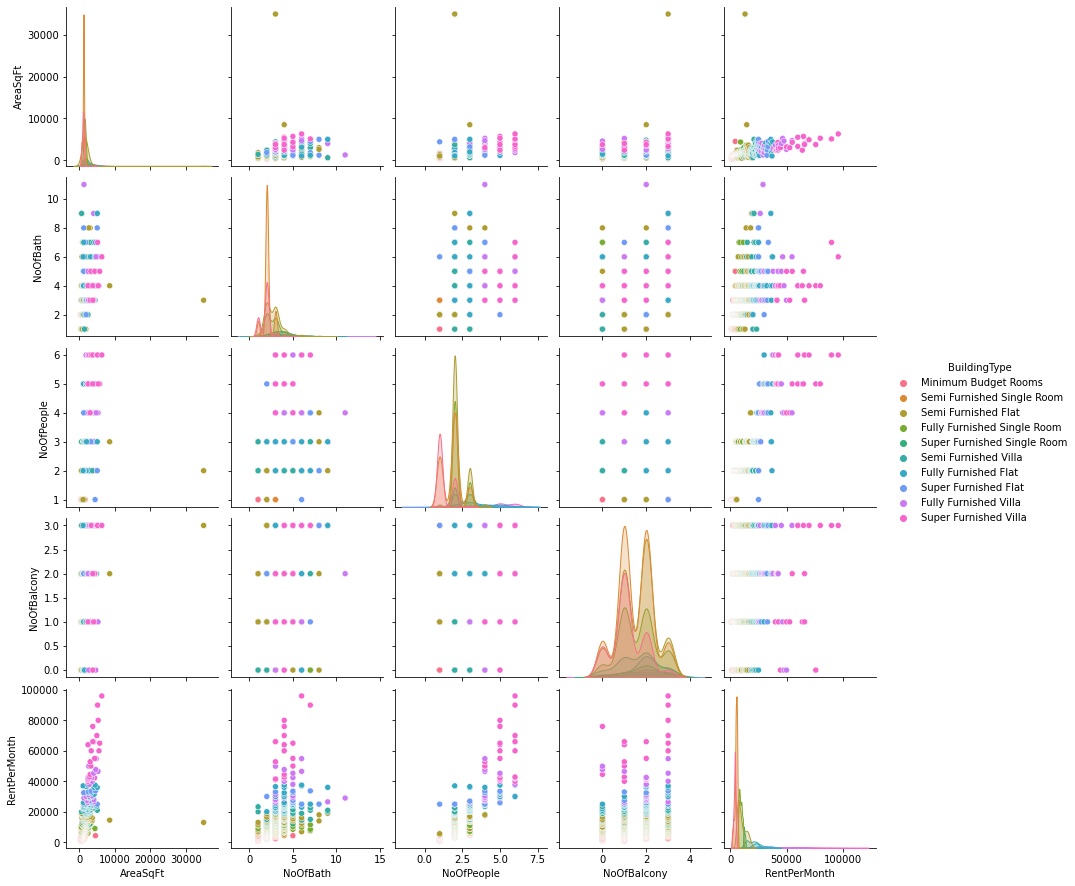

In [52]:
sns.set_palette("Spectral")
sns.pairplot(hbk,hue='BuildingType')

<AxesSubplot:>

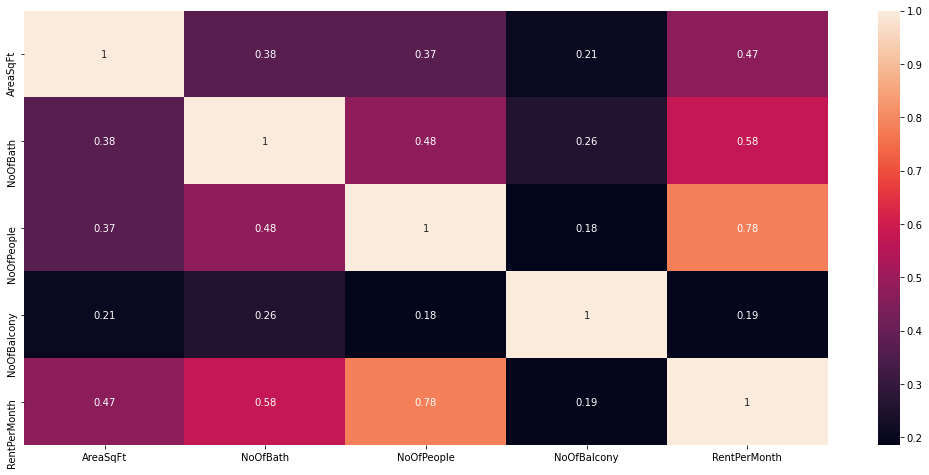

In [53]:
plt.figure(figsize = [18,8])
sns.heatmap(hbk.corr(),annot=True)

C:\Users\jolin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='AreaSqFt', ylabel='Density'>

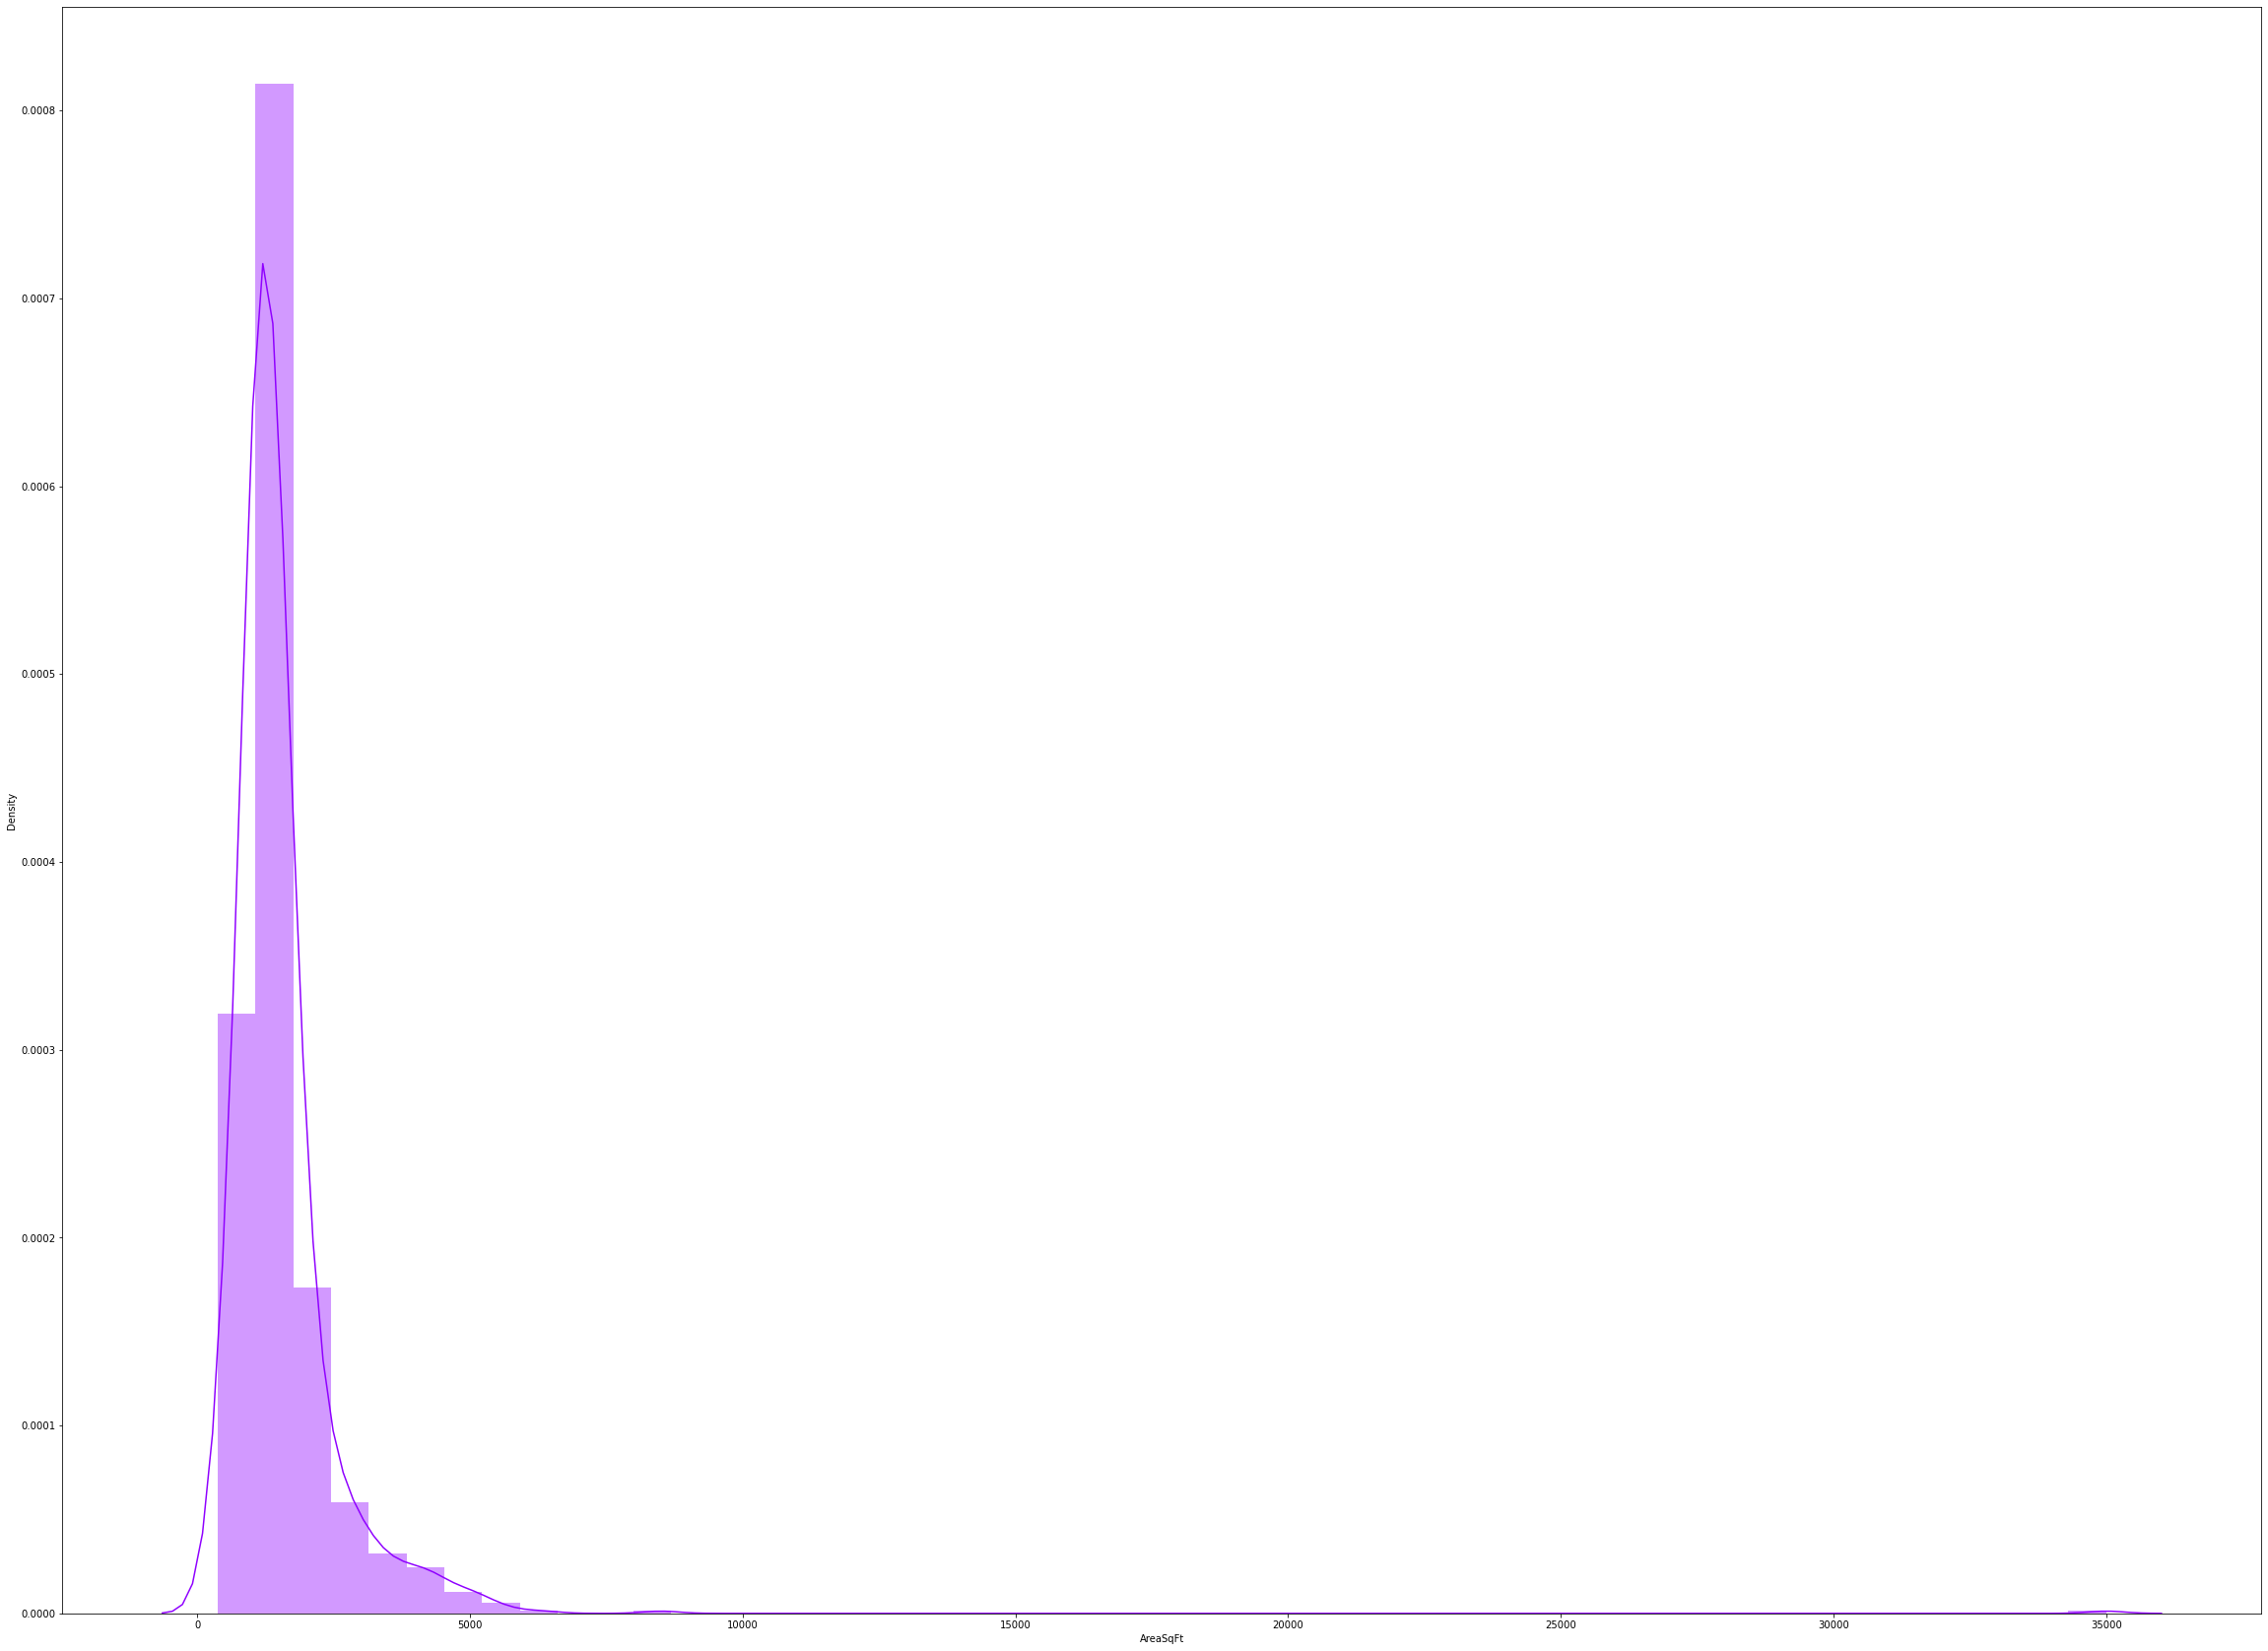

In [57]:
plt.figure(figsize=(40,30))
sns.distplot(hbk['AreaSqFt'], color = '#8F00FF')

**Use the train_test_split method available in SCIKIT to split the dataset into Train Dataset and Test Dataset.**

In [15]:
tts(hbk,shuffle=False)

[                    BuildingType       Location   Size  AreaSqFt  NoOfBath  \
 0           Minimum Budget Rooms    Portofino H  1 BHK     400.0         1   
 1           Minimum Budget Rooms    Portofino H  1 BHK     450.0         1   
 2           Minimum Budget Rooms  School Street  1 BHK     530.0         1   
 3           Minimum Budget Rooms    Portofino B  1 BHK     400.0         1   
 4           Minimum Budget Rooms  School Street  2 BHK     460.0         1   
 ..                           ...            ...    ...       ...       ...   
 745          Semi Furnished Flat  Clubview Road  3 BHK    1801.0         3   
 746          Semi Furnished Flat  Clubview Road  7 BHK    2500.0         6   
 747  Super Furnished Single Room    Portofino D  3 BHK    1560.0         3   
 748          Semi Furnished Flat    Portofino B  3 BHK    1688.0         3   
 749          Semi Furnished Flat  Clubview Road  3 BHK    1900.0         3   
 
      NoOfPeople  NoOfBalcony  RentPerMonth  
 0  

In [59]:
X=hbk[['BuildingType','Location','Size','AreaSqFt','NoOfBath','NoOfPeople','NoOfBalcony']]
y=hbk["RentPerMonth"]

In [60]:
hbk["BuildingType"].value_counts()

Semi Furnished Single Room     274
Semi Furnished Flat            246
Fully Furnished Single Room    153
Minimum Budget Rooms           146
Semi Furnished Villa            63
Fully Furnished Flat            41
Super Furnished Single Room     25
Super Furnished Villa           21
Fully Furnished Villa           19
Super Furnished Flat            12
Name: BuildingType, dtype: int64

In [61]:
hbk["BuildingType"].unique()

array(['Minimum Budget Rooms', 'Semi Furnished Single Room',
       'Semi Furnished Flat', 'Fully Furnished Single Room',
       'Super Furnished Single Room', 'Semi Furnished Villa',
       'Fully Furnished Flat', 'Super Furnished Flat',
       'Fully Furnished Villa', 'Super Furnished Villa'], dtype=object)

In [62]:
hbk['Size'].unique()

array(['1 BHK', '2 BHK', '1 RK', '3 BHK', '4 BHK', '5 BHK', '6 BHK',
       '8 BHK', '7 BHK', '9 BHK'], dtype=object)

In [63]:
hbk['Size'].value_counts()

2 BHK    429
3 BHK    353
4 BHK    103
1 BHK     51
5 BHK     22
6 BHK     21
8 BHK      8
7 BHK      7
9 BHK      4
1 RK       2
Name: Size, dtype: int64

In [64]:
one_hot_encoded_data = pd.get_dummies(X, columns = ['BuildingType', 'Location'])

In [65]:
X1=one_hot_encoded_data
X1

,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,BuildingType_Fully Furnished Flat,BuildingType_Fully Furnished Single Room,BuildingType_Fully Furnished Villa,BuildingType_Minimum Budget Rooms,BuildingType_Semi Furnished Flat,...,Location_Portofino A,Location_Portofino B,Location_Portofino C,Location_Portofino D,Location_Portofino E,Location_Portofino F,Location_Portofino G,Location_Portofino H,Location_School Street,Location_Starter Homes
0,1 BHK,400.0,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1 BHK,450.0,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1 BHK,530.0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1 BHK,400.0,1,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,2 BHK,460.0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4 BHK,4900.0,4,6,3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
996,4 BHK,3750.0,4,5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
997,4 BHK,5270.0,4,5,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
998,6 BHK,5100.0,7,6,3,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [68]:
def remove_BHK(x):
    x=int(x[0])
    return x
remove_BHK('1 BHK')

1

In [72]:
t_size=[]
norm=[]
reg_score=[]
reg_intercept=[]
test_mae=[]
test_mse=[]
test_r2=[]
test_rmse=[]
train_mae = []
train_r2 = []
train_mse = []
train_rmse = []

**50:50**

In [73]:
test_size=1
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=test_size,random_state=42)
reg=LinearRegression(normalize=True)
reg.fit(X_train, y_train)
print("Regression score: ",reg.score(X_test, y_test))
print("Regression intercept: ",reg.intercept_)
print("coef: ",reg.coef_)
print("param: ",reg.get_params(deep=True))


y_pred=reg.predict(X_test)
train_pred = reg.predict(X_train)

print("For Training Data \n --------------------------------")
print("MAE: ",mean_absolute_error(y_train, train_pred))
print("MSE: ",mean_squared_error(y_train, train_pred))
print("r2: ",r2_score(y_train, train_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_train, train_pred)))

print("For Test Data \n --------------------------------")
print("MAE: ",mean_absolute_error(y_test, y_pred))
print("MSE: ",mean_squared_error(y_test, y_pred))
print("r2: ",r2_score(y_test, y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

# Append all these in above empty list
t_size.append(test_size)
norm.append(True)
reg_score.append(reg.score(X_test, y_test))
reg_intercept.append(reg.intercept_)
test_mae.append(mean_absolute_error(y_test, y_pred))
test_mse.append(mean_squared_error(y_test, y_pred))
test_r2.append(r2_score(y_test, y_pred))
test_rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))


train_mae.append(mean_absolute_error(y_train, train_pred))
train_mse.append(mean_squared_error(y_train, train_pred))
train_r2.append(r2_score(y_train, train_pred))
train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))

Regression score:  nan
Regression intercept:  -2.177773218587796e+16
coef:  [ 2.11025785e+02  5.17769937e-01  7.21103641e+02  1.72982531e+03
  1.22298653e+02  3.12435073e+16  3.12435073e+16  3.12435073e+16
  3.12435073e+16  3.12435073e+16  3.12435073e+16  3.12435073e+16
  3.12435073e+16  3.12435073e+16  3.12435073e+16 -9.46577510e+15
 -9.46577510e+15 -9.46577510e+15 -9.46577510e+15 -9.46577510e+15
 -9.46577510e+15 -9.46577510e+15 -9.46577510e+15 -9.46577510e+15
 -9.46577510e+15 -9.46577510e+15]
param:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True, 'positive': False}
For Training Data 
 --------------------------------
MAE:  1854.2727727727727
MSE:  10619352.443193194
r2:  0.903845037661196
RMSE:  3258.734791785486
For Test Data 
 --------------------------------
MAE:  1314.0
MSE:  1726596.0
r2:  nan
RMSE:  1314.0


C:\Users\jolin\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

C:\Users\jolin\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

C:\Users\jolin\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

C:\Users\jolin\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



In [74]:
df1=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
521,7350.0,8664.0


In [75]:
test_size=0.5
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=test_size,random_state=42)
reg=LinearRegression(normalize=False)
reg.fit(X_train, y_train)
print("Regression score: ",reg.score(X_test, y_test))
print("Regression intercept: ",reg.intercept_)
print("coef: ",reg.coef_)
print("param: ",reg.get_params(deep=True))

y_pred=reg.predict(X_test)
train_pred = reg.predict(X_train)

print("For Training Data \n --------------------------------")
print("MAE: ",mean_absolute_error(y_train, train_pred))
print("MSE: ",mean_squared_error(y_train, train_pred))
print("r2: ",r2_score(y_train, train_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_train, train_pred)))


print("For Test Data \n --------------------------------")
print("MAE: ",mean_absolute_error(y_test, y_pred))
print("MSE: ",mean_squared_error(y_test, y_pred))
print("r2: ",r2_score(y_test, y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

# Append all these in above empty list
t_size.append(test_size)
norm.append(False)
reg_score.append(reg.score(X_test, y_test))
reg_intercept.append(reg.intercept_)
test_mae.append(mean_absolute_error(y_test, y_pred))
test_mse.append(mean_squared_error(y_test, y_pred))
test_r2.append(r2_score(y_test, y_pred))
test_rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))


train_mae.append(mean_absolute_error(y_train, train_pred))
train_mse.append(mean_squared_error(y_train, train_pred))
train_r2.append(r2_score(y_train, train_pred))
train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))

Regression score:  0.903682412842022
Regression intercept:  11949.889618539808
coef:  [ 4.97127029e+02  3.77181974e-01  7.30409079e+02  1.48800052e+03
  1.11468538e+01  4.60157363e+03 -1.04275606e+04  1.53389027e+04
 -1.25176826e+04 -9.36868662e+03 -1.27994327e+04 -3.34838454e+03
  3.60889362e+03 -7.00798053e+03  3.19203576e+04 -1.33355686e+02
  5.47963163e+02  5.09463848e+02  5.43106231e+02 -4.85991393e+02
 -2.37428563e+02  1.33965593e+03  2.07043940e+02  1.90801186e+02
 -1.08150695e+03 -1.39975170e+03]
param:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}
For Training Data 
 --------------------------------
MAE:  1981.993400332178
MSE:  11727302.86258993
r2:  0.8903675949869166
RMSE:  3424.5149820945344
For Test Data 
 --------------------------------
MAE:  1908.459122965936
MSE:  10939995.20161191
r2:  0.903682412842022
RMSE:  3307.56635634297


In [76]:
df2=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
521,7350.0,8976.075782
737,11300.0,9384.153064
740,11500.0,8326.456832
660,9500.0,10334.116854
411,6000.0,7361.423841
...,...,...
178,4400.0,2471.847458
444,6500.0,4548.157109
416,6100.0,5144.691028
870,18500.0,9143.449160


**60:40**

In [77]:
# Creating a LinearRegressor model with normalization True and finding error,accuracy
test_size=0.4
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=test_size,random_state=42)
reg=LinearRegression(normalize=True)
reg.fit(X_train, y_train)
print("Regression score: ",reg.score(X_test, y_test))
print("Regression intercept: ",reg.intercept_)
print("coef: ",reg.coef_)
print("param: ",reg.get_params(deep=True))

y_pred=reg.predict(X_test)
train_pred = reg.predict(X_train)

print("For Training Data \n --------------------------------")
print("MAE: ",mean_absolute_error(y_train, train_pred))
print("MSE: ",mean_squared_error(y_train, train_pred))
print("r2: ",r2_score(y_train, train_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_train, train_pred)))


print("For Test Data \n --------------------------------")
print("MAE: ",mean_absolute_error(y_test, y_pred))
print("MSE: ",mean_squared_error(y_test, y_pred))
print("r2: ",r2_score(y_test, y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

# Append all these in above empty list
t_size.append(test_size)
norm.append(True)
reg_score.append(reg.score(X_test, y_test))
reg_intercept.append(reg.intercept_)
test_mae.append(mean_absolute_error(y_test, y_pred))
test_mse.append(mean_squared_error(y_test, y_pred))
test_r2.append(r2_score(y_test, y_pred))
test_rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))


train_mae.append(mean_absolute_error(y_train, train_pred))
train_mse.append(mean_squared_error(y_train, train_pred))
train_r2.append(r2_score(y_train, train_pred))
train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))

Regression score:  0.9067619218294205
Regression intercept:  4184.183831117612
coef:  [ 4.55153737e+02  3.97217125e-01  6.72029889e+02  1.47840038e+03
 -3.72341150e+01  1.21231578e+04 -2.26663297e+03  2.32756276e+04
 -4.65734232e+03 -1.32813237e+03 -4.77824375e+03  4.97558401e+03
  1.20030957e+04  1.17141942e+03  3.98016322e+04 -1.46896775e+02
  4.01528060e+02  4.09559974e+02  5.53677368e+02 -4.56673581e+02
 -1.25072104e+02  8.15771911e+02  7.45088605e+01  6.75452019e+01
 -8.18326127e+02 -1.26714885e+03]
param:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True, 'positive': False}
For Training Data 
 --------------------------------
MAE:  1908.7916722131256
MSE:  10695847.185576342
r2:  0.8934159923725754
RMSE:  3270.450608949223
For Test Data 
 --------------------------------
MAE:  1882.7377731597799
MSE:  11684714.475910774
r2:  0.9067619218294205
RMSE:  3418.2911631268003


In [78]:
df3=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

,Actual,Predicted
521,7350.0,8906.275447
737,11300.0,9406.805784
740,11500.0,8428.015093
660,9500.0,10170.896197
411,6000.0,7247.654257
...,...,...
56,2950.0,4177.241692
405,6000.0,7263.820558
442,6450.0,6649.803975
757,12000.0,10238.042615


In [79]:
# Creating a LinearRegressor model with normalization False and finding error,accuracy
test_size=0.4
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=test_size,random_state=42)
reg=LinearRegression(normalize=False)
reg.fit(X_train, y_train)
print("Regression score: ",reg.score(X_test, y_test))
print("Regression intercept: ",reg.intercept_)
print("coef: ",reg.coef_)
print("param: ",reg.get_params(deep=True))

y_pred=reg.predict(X_test)
train_pred = reg.predict(X_train)

print("For Training Data \n --------------------------------")
print("MAE: ",mean_absolute_error(y_train, train_pred))
print("MSE: ",mean_squared_error(y_train, train_pred))
print("r2: ",r2_score(y_train, train_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_train, train_pred)))


print("For Test Data \n --------------------------------")
print("MAE: ",mean_absolute_error(y_test, y_pred))
print("MSE: ",mean_squared_error(y_test, y_pred))
print("r2: ",r2_score(y_test, y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

# Append all these in above empty list
t_size.append(test_size)
norm.append(False)
reg_score.append(reg.score(X_test, y_test))
reg_intercept.append(reg.intercept_)
test_mae.append(mean_absolute_error(y_test, y_pred))
test_mse.append(mean_squared_error(y_test, y_pred))
test_r2.append(r2_score(y_test, y_pred))
test_rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))


train_mae.append(mean_absolute_error(y_train, train_pred))
train_mse.append(mean_squared_error(y_train, train_pred))
train_r2.append(r2_score(y_train, train_pred))
train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))

Regression score:  0.9067619218293752
Regression intercept:  12171.51617670467
coef:  [ 4.55153737e+02  3.97217125e-01  6.72029889e+02  1.47840038e+03
 -3.72341150e+01  4.09114126e+03 -1.02986495e+04  1.52436111e+04
 -1.26893588e+04 -9.36014890e+03 -1.28102603e+04 -3.05643252e+03
  3.97107921e+03 -6.86059712e+03  3.17696156e+04 -1.02212588e+02
  4.46212247e+02  4.54244161e+02  5.98361555e+02 -4.11989394e+02
 -8.03879173e+01  8.60456098e+02  1.19193048e+02  1.12229389e+02
 -7.73641940e+02 -1.22246466e+03]
param:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}
For Training Data 
 --------------------------------
MAE:  1908.7916722133275
MSE:  10695847.185576342
r2:  0.8934159923725754
RMSE:  3270.450608949223
For Test Data 
 --------------------------------
MAE:  1882.7377731603053
MSE:  11684714.47591645
r2:  0.9067619218293752
RMSE:  3418.2911631276306


In [80]:
df4=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df4

,Actual,Predicted
521,7350.0,8906.275447
737,11300.0,9406.805784
740,11500.0,8428.015093
660,9500.0,10170.896197
411,6000.0,7247.654257
...,...,...
56,2950.0,4177.241692
405,6000.0,7263.820558
442,6450.0,6649.803975
757,12000.0,10238.042615


**70:30**

In [81]:
# Creating a LinearRegressor model with normalization True and finding error,accuracy
test_size=0.3
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=test_size,random_state=42)
reg=LinearRegression(normalize=True)
reg.fit(X_train, y_train)
print("Regression score: ",reg.score(X_test, y_test))
print("Regression intercept: ",reg.intercept_)
print("coef: ",reg.coef_)
print("param: ",reg.get_params(deep=True))

y_pred=reg.predict(X_test)
train_pred = reg.predict(X_train)

print("For Training Data \n --------------------------------")
print("MAE: ",mean_absolute_error(y_train, train_pred))
print("MSE: ",mean_squared_error(y_train, train_pred))
print("r2: ",r2_score(y_train, train_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_train, train_pred)))


print("For Test Data \n --------------------------------")
print("MAE: ",mean_absolute_error(y_test, y_pred))
print("MSE: ",mean_squared_error(y_test, y_pred))
print("r2: ",r2_score(y_test, y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

# Append all these in above empty list
t_size.append(test_size)
norm.append(True)
reg_score.append(reg.score(X_test, y_test))
reg_intercept.append(reg.intercept_)
test_mae.append(mean_absolute_error(y_test, y_pred))
test_mse.append(mean_squared_error(y_test, y_pred))
test_r2.append(r2_score(y_test, y_pred))
test_rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))


train_mae.append(mean_absolute_error(y_train, train_pred))
train_mse.append(mean_squared_error(y_train, train_pred))
train_r2.append(r2_score(y_train, train_pred))
train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))

Regression score:  0.9053864789975705
Regression intercept:  4331.249518753861
coef:  [ 4.72963391e+02  4.05996344e-01  5.68027161e+02  1.39136953e+03
  2.94774251e+01  1.23057450e+04 -2.06001570e+03  2.30071937e+04
 -4.82654544e+03 -1.28153771e+03 -4.71334878e+03  5.15973522e+03
  1.19890088e+04  1.29889329e+03  4.25736097e+04 -1.26929182e+02
  4.83468354e+02  3.15227772e+02  4.64999550e+02 -5.06102065e+02
 -3.50480296e+01  6.05852985e+02 -3.79193314e+01  1.56398435e+02
 -5.66535576e+02 -1.56326437e+03]
param:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True, 'positive': False}
For Training Data 
 --------------------------------
MAE:  1843.4455506202232
MSE:  10350183.181031534
r2:  0.8980917233088208
RMSE:  3217.1700578352297
For Test Data 
 --------------------------------
MAE:  1949.310316917093
MSE:  12356136.685757564
r2:  0.9053864789975705
RMSE:  3515.129682637266


In [82]:
df5=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df5

,Actual,Predicted
521,7350.0,8736.182870
737,11300.0,9387.438750
740,11500.0,8368.677029
660,9500.0,9917.648157
411,6000.0,7036.228653
...,...,...
468,6600.0,8899.429495
935,25200.0,24596.893824
428,6200.0,6513.918771
7,1645.0,1775.070315


In [83]:
# Creating a LinearRegressor model with normalization False and finding error,accuracy
test_size=0.3
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=test_size,random_state=42)
reg=LinearRegression(normalize=False)
reg.fit(X_train, y_train)
print("Regression score: ",reg.score(X_test, y_test))
print("Regression intercept: ",reg.intercept_)
print("coef: ",reg.coef_)
print("param: ",reg.get_params(deep=True))

y_pred=reg.predict(X_test)
train_pred = reg.predict(X_train)

print("For Training Data \n --------------------------------")
print("MAE: ",mean_absolute_error(y_train, train_pred))
print("MSE: ",mean_squared_error(y_train, train_pred))
print("r2: ",r2_score(y_train, train_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_train, train_pred)))


print("For Test Data \n --------------------------------")
print("MAE: ",mean_absolute_error(y_test, y_pred))
print("MSE: ",mean_squared_error(y_test, y_pred))
print("r2: ",r2_score(y_test, y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

# Append all these in above empty list
t_size.append(test_size)
norm.append(False)
reg_score.append(reg.score(X_test, y_test))
reg_intercept.append(reg.intercept_)
test_mae.append(mean_absolute_error(y_test, y_pred))
test_mse.append(mean_squared_error(y_test, y_pred))
test_r2.append(r2_score(y_test, y_pred))
test_rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))


train_mae.append(mean_absolute_error(y_train, train_pred))
train_mse.append(mean_squared_error(y_train, train_pred))
train_r2.append(r2_score(y_train, train_pred))
train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))

Regression score:  0.9053864789975634
Regression intercept:  12602.900470338402
coef:  [ 4.72963391e+02  4.05996344e-01  5.68027161e+02  1.39136953e+03
  2.94774251e+01  3.96047116e+03 -1.04052895e+04  1.46619199e+04
 -1.31718193e+04 -9.62681152e+03 -1.30586226e+04 -3.18553859e+03
  3.64373501e+03 -7.04638052e+03  3.42283359e+04 -5.33063223e+01
  5.57091214e+02  3.88850632e+02  5.38622410e+02 -4.32479205e+02
  3.85748300e+01  6.79475845e+02  3.57035283e+01  2.30021295e+02
 -4.92912716e+02 -1.48964151e+03]
param:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}
For Training Data 
 --------------------------------
MAE:  1843.4455506206523
MSE:  10350183.181031534
r2:  0.8980917233088208
RMSE:  3217.1700578352297
For Test Data 
 --------------------------------
MAE:  1949.3103169175056
MSE:  12356136.685758488
r2:  0.9053864789975634
RMSE:  3515.1296826373973


In [84]:
df6=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df6

,Actual,Predicted
521,7350.0,8736.182870
737,11300.0,9387.438750
740,11500.0,8368.677029
660,9500.0,9917.648157
411,6000.0,7036.228653
...,...,...
468,6600.0,8899.429495
935,25200.0,24596.893824
428,6200.0,6513.918771
7,1645.0,1775.070315


In [85]:
# Creating a LinearRegressor model with normalization False and finding error,accuracy
test_size=0.2
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=test_size,random_state=42)
reg=LinearRegression(normalize=False)
reg.fit(X_train, y_train)
print("Regression score: ",reg.score(X_test, y_test))
print("Regression intercept: ",reg.intercept_)
print("coef: ",reg.coef_)
print("param: ",reg.get_params(deep=True))

y_pred=reg.predict(X_test)
train_pred = reg.predict(X_train)

print("For Training Data \n --------------------------------")
print("MAE: ",mean_absolute_error(y_train, train_pred))
print("MSE: ",mean_squared_error(y_train, train_pred))
print("r2: ",r2_score(y_train, train_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_train, train_pred)))


print("For Test Data \n --------------------------------")
print("MAE: ",mean_absolute_error(y_test, y_pred))
print("MSE: ",mean_squared_error(y_test, y_pred))
print("r2: ",r2_score(y_test, y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))


# Append all these in above empty list
t_size.append(test_size)
norm.append(False)
reg_score.append(reg.score(X_test, y_test))
reg_intercept.append(reg.intercept_)
test_mae.append(mean_absolute_error(y_test, y_pred))
test_mse.append(mean_squared_error(y_test, y_pred))
test_r2.append(r2_score(y_test, y_pred))
test_rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))


train_mae.append(mean_absolute_error(y_train, train_pred))
train_mse.append(mean_squared_error(y_train, train_pred))
train_r2.append(r2_score(y_train, train_pred))
train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))

Regression score:  0.899336348543138
Regression intercept:  12294.574035122434
coef:  [ 3.50220945e+02  4.12571191e-01  7.24243511e+02  1.40882836e+03
  4.74328156e+01  3.70064087e+03 -1.01987902e+04  1.38467924e+04
 -1.29921958e+04 -9.48802542e+03 -1.28594634e+04 -2.77366911e+03
  3.85633803e+03 -6.72439580e+03  3.36327685e+04  2.05800135e+00
  4.31988754e+02  3.30999555e+02  7.72645254e+02 -5.07109433e+02
  1.15912156e+02  7.51370433e+02  6.03840184e+01  1.62823784e+02
 -4.87784717e+02 -1.63328781e+03]
param:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}
For Training Data 
 --------------------------------
MAE:  1831.3785739140474
MSE:  10117913.586844638
r2:  0.9026774057601936
RMSE:  3180.8667980355035
For Test Data 
 --------------------------------
MAE:  2003.9128763877188
MSE:  13639889.491244523
r2:  0.899336348543138
RMSE:  3693.222101532011


In [86]:
# Create a dataframe and compare between actual and predicted values
df7=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df7

,Actual,Predicted
521,7350.0,8636.337773
737,11300.0,9702.002714
740,11500.0,8405.311360
660,9500.0,9853.551861
411,6000.0,7050.344917
...,...,...
408,6000.0,9262.675257
332,5500.0,4973.076735
208,4580.0,3024.138099
613,8505.0,7539.511049


**80:20**

In [87]:
# Creating a LinearRegressor model with normalization True and finding error,accuracy
test_size=0.2
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=test_size,random_state=42)
reg=LinearRegression(normalize=True)
reg.fit(X_train, y_train)
print("Regression score: ",reg.score(X_test, y_test))
print("Regression intercept: ",reg.intercept_)
print("coef: ",reg.coef_)
print("param: ",reg.get_params(deep=True))

y_pred=reg.predict(X_test)
train_pred = reg.predict(X_train)

print("For Training Data \n --------------------------------")
print("MAE: ",mean_absolute_error(y_train, train_pred))
print("MSE: ",mean_squared_error(y_train, train_pred))
print("r2: ",r2_score(y_train, train_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_train, train_pred)))


print("For Test Data \n --------------------------------")
print("MAE: ",mean_absolute_error(y_test, y_pred))
print("MSE: ",mean_squared_error(y_test, y_pred))
print("r2: ",r2_score(y_test, y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

# Append all these in above empty list
t_size.append(test_size)
norm.append(True)
reg_score.append(reg.score(X_test, y_test))
reg_intercept.append(reg.intercept_)
test_mae.append(mean_absolute_error(y_test, y_pred))
test_mse.append(mean_squared_error(y_test, y_pred))
test_r2.append(r2_score(y_test, y_pred))
test_rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))


train_mae.append(mean_absolute_error(y_train, train_pred))
train_mse.append(mean_squared_error(y_train, train_pred))
train_r2.append(r2_score(y_train, train_pred))
train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))

Regression score:  0.8993363485431709
Regression intercept:  4240.4876480155135
coef:  [ 3.50220945e+02  4.12571191e-01  7.24243511e+02  1.40882836e+03
  4.74328156e+01  1.18301185e+04 -2.06931255e+03  2.19762700e+04
 -4.86271819e+03 -1.35854778e+03 -4.72998580e+03  5.35580853e+03
  1.19858157e+04  1.40508184e+03  4.17622461e+04 -7.33332495e+01
  3.56597503e+02  2.55608304e+02  6.97254003e+02 -5.82500684e+02
  4.05209055e+01  6.75979182e+02 -1.50072324e+01  8.74325328e+01
 -5.63175968e+02 -1.70867906e+03]
param:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True, 'positive': False}
For Training Data 
 --------------------------------
MAE:  1831.3785739135387
MSE:  10117913.586844638
r2:  0.9026774057601936
RMSE:  3180.8667980355035
For Test Data 
 --------------------------------
MAE:  2003.9128763883575
MSE:  13639889.491240066
r2:  0.8993363485431709
RMSE:  3693.2221015314076


In [88]:
# Create a dataframe and compare between actual and predicted values
df8=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df8

,Actual,Predicted
521,7350.0,8636.337773
737,11300.0,9702.002714
740,11500.0,8405.311360
660,9500.0,9853.551861
411,6000.0,7050.344917
...,...,...
408,6000.0,9262.675257
332,5500.0,4973.076735
208,4580.0,3024.138099
613,8505.0,7539.511049


In [89]:
# Createing a dataframe with all error and accuracy values of all split case
df9=pd.DataFrame({'test_size':t_size, 'norm':norm, 'reg_score':reg_score, 'reg_intercept':reg_intercept, 'train_mae':train_mae, 'train_mse':train_mse, 'train_r2':train_r2, 'train_rmse':train_rmse, 'test_mae':test_mae, 'test_mse':test_mse, 'test_r2':test_r2, 'test_rmse':test_rmse})
df9

,test_size,norm,reg_score,reg_intercept,train_mae,train_mse,train_r2,train_rmse,test_mae,test_mse,test_r2,test_rmse
0,1.0,True,NaN,-2.177773e+16,1854.272773,1.061935e+07,0.903845,3258.734792,1314.000000,1.726596e+06,NaN,1314.000000
1,0.5,False,0.903682,1.194989e+04,1981.993400,1.172730e+07,0.890368,3424.514982,1908.459123,1.094000e+07,0.903682,3307.566356
2,0.4,True,0.906762,4.184184e+03,1908.791672,1.069585e+07,0.893416,3270.450609,1882.737773,1.168471e+07,0.906762,3418.291163
3,0.4,False,0.906762,1.217152e+04,1908.791672,1.069585e+07,0.893416,3270.450609,1882.737773,1.168471e+07,0.906762,3418.291163
4,0.3,True,0.905386,4.331250e+03,1843.445551,1.035018e+07,0.898092,3217.170058,1949.310317,1.235614e+07,0.905386,3515.129683
5,0.3,False,0.905386,1.260290e+04,1843.445551,1.035018e+07,0.898092,3217.170058,1949.310317,1.235614e+07,0.905386,3515.129683
6,0.2,False,0.899336,1.229457e+04,1831.378574,1.011791e+07,0.902677,3180.866798,2003.912876,1.363989e+07,0.899336,3693.222102
7,0.2,True,0.899336,4.240488e+03,1831.378574,1.011791e+07,0.902677,3180.866798,2003.912876,1.363989e+07,0.899336,3693.222102


In [90]:
df9

,test_size,norm,reg_score,reg_intercept,train_mae,train_mse,train_r2,train_rmse,test_mae,test_mse,test_r2,test_rmse
0,1.0,True,NaN,-2.177773e+16,1854.272773,1.061935e+07,0.903845,3258.734792,1314.000000,1.726596e+06,NaN,1314.000000
1,0.5,False,0.903682,1.194989e+04,1981.993400,1.172730e+07,0.890368,3424.514982,1908.459123,1.094000e+07,0.903682,3307.566356
2,0.4,True,0.906762,4.184184e+03,1908.791672,1.069585e+07,0.893416,3270.450609,1882.737773,1.168471e+07,0.906762,3418.291163
3,0.4,False,0.906762,1.217152e+04,1908.791672,1.069585e+07,0.893416,3270.450609,1882.737773,1.168471e+07,0.906762,3418.291163
4,0.3,True,0.905386,4.331250e+03,1843.445551,1.035018e+07,0.898092,3217.170058,1949.310317,1.235614e+07,0.905386,3515.129683
5,0.3,False,0.905386,1.260290e+04,1843.445551,1.035018e+07,0.898092,3217.170058,1949.310317,1.235614e+07,0.905386,3515.129683
6,0.2,False,0.899336,1.229457e+04,1831.378574,1.011791e+07,0.902677,3180.866798,2003.912876,1.363989e+07,0.899336,3693.222102
7,0.2,True,0.899336,4.240488e+03,1831.378574,1.011791e+07,0.902677,3180.866798,2003.912876,1.363989e+07,0.899336,3693.222102


In [91]:
df9

,test_size,norm,reg_score,reg_intercept,train_mae,train_mse,train_r2,train_rmse,test_mae,test_mse,test_r2,test_rmse
0,1.0,True,NaN,-2.177773e+16,1854.272773,1.061935e+07,0.903845,3258.734792,1314.000000,1.726596e+06,NaN,1314.000000
1,0.5,False,0.903682,1.194989e+04,1981.993400,1.172730e+07,0.890368,3424.514982,1908.459123,1.094000e+07,0.903682,3307.566356
2,0.4,True,0.906762,4.184184e+03,1908.791672,1.069585e+07,0.893416,3270.450609,1882.737773,1.168471e+07,0.906762,3418.291163
3,0.4,False,0.906762,1.217152e+04,1908.791672,1.069585e+07,0.893416,3270.450609,1882.737773,1.168471e+07,0.906762,3418.291163
4,0.3,True,0.905386,4.331250e+03,1843.445551,1.035018e+07,0.898092,3217.170058,1949.310317,1.235614e+07,0.905386,3515.129683
5,0.3,False,0.905386,1.260290e+04,1843.445551,1.035018e+07,0.898092,3217.170058,1949.310317,1.235614e+07,0.905386,3515.129683
6,0.2,False,0.899336,1.229457e+04,1831.378574,1.011791e+07,0.902677,3180.866798,2003.912876,1.363989e+07,0.899336,3693.222102
7,0.2,True,0.899336,4.240488e+03,1831.378574,1.011791e+07,0.902677,3180.866798,2003.912876,1.363989e+07,0.899336,3693.222102


**Questions**
1. What are your observations on the Dataset?
2. What are the different Error Measures (Evaluation Metrics) in relation to Linear Regression? How much do you get in the above cases?
3. Note down the errors/losses when the train-test ratio is 50:50, 60:40, 70:30, and 80:20
4. During LinearRegression() process, what is the impact of giving TRUE/FALSE as the value for Normalize Parameter?

**1. Observation on the dataset**
- The dataset shows the 
  1. Building Type - Is it a fully/semi/Un furnished Single Room, Flat, or Villa ?
  1. Location - Where is the property located?
  1. Size - Is it 1BHK, 2BHK, 3BHK ?
  1. AreaSqFt - How much big is the property ? 
  1. No of Bath - How many bathrooms in the property?
  1. No of Balcony - How many balconies in the property?
  1. No of People - How many people stayed in the building in the academic year 2020-21.
  1. RentPerMonth - Rent to be paid per month which is demanded by the current building owners.

**2. What are the different Error Measures (Evaluation Metrics) in relation to Linear Regression? How much do you get in the above cases?**
 - Different Error Measures (Evaluation Metrics) in relation to Linear Regression are MAE, MSE, r2, RMSE

### Predicting rent for the given requirements
 - Cases
   - Try to predict the rent of the below houses -
   - 1. 1 BHK with 2 Baths in Portofino Street
   - 2. Fully Furnished 2 BHK in School Street
   - 3. Single Room anywhere in Lavasa

 - From all the above spliting train-test ration we can see that our 80:20 split ratio with normalization True is good model with accuracy 90%. So we can predict these cases from that model.

In [93]:
req_dict = dict()
for i in X_test.columns:
    print(i,": ")
    req_dict[i] = float(input())

Size : 
1
AreaSqFt : 
650
NoOfBath : 
2
NoOfPeople : 
1
NoOfBalcony : 
1
BuildingType_Fully Furnished Flat : 
1
BuildingType_Fully Furnished Single Room : 
1
BuildingType_Fully Furnished Villa : 
1
BuildingType_Minimum Budget Rooms : 
1
BuildingType_Semi Furnished Flat : 
1
BuildingType_Semi Furnished Single Room : 
1
BuildingType_Semi Furnished Villa : 
1
BuildingType_Super Furnished Flat : 
1
BuildingType_Super Furnished Single Room : 
1
BuildingType_Super Furnished Villa : 
1
Location_Clubview Road : 
1
Location_Portofino A : 
0
Location_Portofino B : 
0
Location_Portofino C : 
1
Location_Portofino D : 
0
Location_Portofino E : 
1
Location_Portofino F : 
0
Location_Portofino G : 
1
Location_Portofino H : 
3
Location_School Street : 
1
Location_Starter Homes : 
2


In [94]:
req_df=pd.DataFrame(req_dict,index=[0])
req_df

,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,BuildingType_Fully Furnished Flat,BuildingType_Fully Furnished Single Room,BuildingType_Fully Furnished Villa,BuildingType_Minimum Budget Rooms,BuildingType_Semi Furnished Flat,...,Location_Portofino A,Location_Portofino B,Location_Portofino C,Location_Portofino D,Location_Portofino E,Location_Portofino F,Location_Portofino G,Location_Portofino H,Location_School Street,Location_Starter Homes
0,1.0,650.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,2.0


In [96]:
reg.predict(req_df)

array([85989.60239078])

# Conclusion:
 - In this lab, we have tried to gain the knowledge about data and its varibles, further we did some preprocessing to the data in order to bring it into more analyst friendly mode, laterly we implemented various graphs using various libraries in order to get valuable insights, furthermore, we implemented and evaluated LinearRegression model to get high accuracy in term of predicting rental price to find houses for people who are in search for the one according to their preferences.

# Reference
 - https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/
 - https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/
 - https://pandas.pydata.org/
 - https://matplotlib.org/
 - https://seaborn.pydata.org/
 - https://plotly.com/
 - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
 - https://www.kaggle.com/c/house-prices-advanced-regression-techniques